In [1]:
import pandas as pd
import numpy as np
from pyarrow import Table
import pyarrow.dataset as ds
import pyarrow.compute as pc
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
from source import *

import scienceplots

plt.style.use(['science','ieee', 'grid'])
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [ ]:
sig = ds.dataset("sig_data/merged.parquet", format="parquet")
bsbs = ds.dataset([f"gen_data/bsbs_{i}.parquet" for i in range(1, 22)], format="parquet")

In [3]:
scanner = bsbs.scanner(batch_size=100_000)
for batch in scanner.to_batches():
    table = Table.from_batches([batch])
    display(table.to_pandas().columns)
    display(table.to_pandas()[['asymmetry',]].head(100))
    break
del scanner

Index(['__experiment__', '__run__', '__event__', '__production__', 'pcm',
       'ecm', 'missedE', 'recM2_Ups', 'pmiss', 'thetamiss', 'fox', 'asymmetry',
       'p0', 'theta_Bs', 'M0', 'recM2_Bs', 'idec0', 'idec1', 'is0', 'N_KL',
       'Miss_id_0', 'Miss_id_1', 'Bs_lik', 'N_KS', 'theta_tau_0', 'p_tau_0',
       'theta_tau_1', 'p_tau_1', 'tau_d_0_0', 'tau_d_1_0', 'tau_last_z_0',
       'tau_last_r_0', 'tau_last_z_1', 'tau_last_r_1', 'totalEnergyMC',
       'E_gamma_in_ROE', 'correct_nu_0', 'correct_nu_1', 'correct_gamma_0',
       'correct_gamma_1', 'lost_0', 'lost_1', 'PID_self_vs_0_tau0',
       'PID_self_vs_1_tau0', 'PID_self_vs_2_tau0', 'PID_self_vs_4_tau0',
       'PID_self_vs_0_tau1', 'PID_self_vs_1_tau1', 'PID_self_vs_2_tau1',
       'PID_self_vs_4_tau1'],
      dtype='object')

,asymmetry
0,2.166412
1,2.166412
2,2.166412
3,2.166412
4,2.166412
...,...
95,0.584664
96,0.547792
97,0.242345
98,0.286015


In [4]:
scanner = sig.scanner(batch_size=100_000)
for batch in scanner.to_batches():
    table = Table.from_batches([batch])
    display(table.to_pandas().columns)
    display(table.to_pandas()[['asymmetry',]].head(100))
    break
del scanner

Index(['__experiment__', '__run__', '__event__', '__production__', 'pcm',
       'ecm', 'missedE', 'recM2_Ups', 'pmiss', 'thetamiss', 'fox', 'asymmetry',
       'p0', 'theta_Bs', 'M0', 'recM2_Bs', 'idec0', 'idec1', 'is0', 'N_KL',
       'Miss_id_0', 'Miss_id_1', 'Bs_lik', 'N_KS', 'theta_tau_0', 'p_tau_0',
       'theta_tau_1', 'p_tau_1', 'tau_d_0_0', 'tau_d_1_0', 'tau_last_z_0',
       'tau_last_r_0', 'tau_last_z_1', 'tau_last_r_1', 'totalEnergyMC',
       'E_gamma_in_ROE', 'correct_nu_0', 'correct_nu_1', 'correct_gamma_0',
       'correct_gamma_1', 'lost_0', 'lost_1', 'PID_self_vs_0_tau0',
       'PID_self_vs_1_tau0', 'PID_self_vs_2_tau0', 'PID_self_vs_4_tau0',
       'PID_self_vs_0_tau1', 'PID_self_vs_1_tau1', 'PID_self_vs_2_tau1',
       'PID_self_vs_4_tau1'],
      dtype='object')

,asymmetry
0,NaN
1,NaN
2,NaN
3,0.724231
4,1.011221
...,...
95,NaN
96,-1.960127
97,-1.504620
98,-2.708973


In [25]:
decay_mod_tau = ["$e^+ \\nu_e \\bar \\nu_\\tau$", "$\mu^+ \\nu_\\mu \\bar \\nu_\\tau$", "$\\pi^+ \\bar \\nu_\\tau$", "$\\rho^+ (\\pi^+ \\pi^0) \\bar \\nu_\\tau$", "$\\pi^+ \\pi^+ \\pi^- \\bar \\nu_\\tau$", "$\\rho^+ (\\pi^+ \\gamma) \\bar \\nu_\\tau$"]
mask = (pc.field("E_gamma_in_ROE") < 1.2)
mask_M = (pc.field("M0") > 5.347) &  (pc.field("M0") < 5.387) 
mask1 = (pc.field("E_gamma_in_ROE") < 1.2) & (pc.field("is0") == 1) & (pc.field("Bs_lik") > 0.0012) &  (pc.field("M0") > 5.347) &  (pc.field("M0") < 5.387) 
mask0 = (pc.field("E_gamma_in_ROE") < 1.2) & (pc.field("is0") == 0) & (pc.field("Bs_lik") > 0.0012) &  (pc.field("M0") > 5.347) &  (pc.field("M0") < 5.387)
mask_is1 = pc.field("correct_nu_0") & pc.field("correct_nu_1") & pc.field("correct_gamma_0") & pc.field("correct_gamma_1") & pc.field("lost_0") & pc.field("lost_1") & pc.field("Miss_id_0") & pc.field("Miss_id_1")
mask_is0 = pc.field("is0") == 1
mask_lep = ((pc.field("idec0") == 0) | (pc.field("idec0") == 1)) & ((pc.field("idec1") == 0) | (pc.field("idec1") == 1))
mask_miss_id = pc.field("Miss_id_0") & pc.field("Miss_id_1")
mask_lost_Kpi = pc.field("lost_0") & pc.field("lost_1")
mask_KS_veto = (pc.field("N_KS") == 0) & (pc.field("N_KL") == 0)

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\matve\AppData\Local\Temp\ipykernel_16544\985725725.py:1: SyntaxWarning: invalid escape sequence '\m'
  decay_mod_tau = ["$e^+ \\nu_e \\bar \\nu_\\tau$", "$\mu^+ \\nu_\\mu \\bar \\nu_\\tau$", "$\\pi^+ \\bar \\nu_\\tau$", "$\\rho^+ (\\pi^+ \\pi^0) \\bar \\nu_\\tau$", "$\\pi^+ \\pi^+ \\pi^- \\bar \\nu_\\tau$", "$\\rho^+ (\\pi^+ \\gamma) \\bar \\nu_\\tau$"]


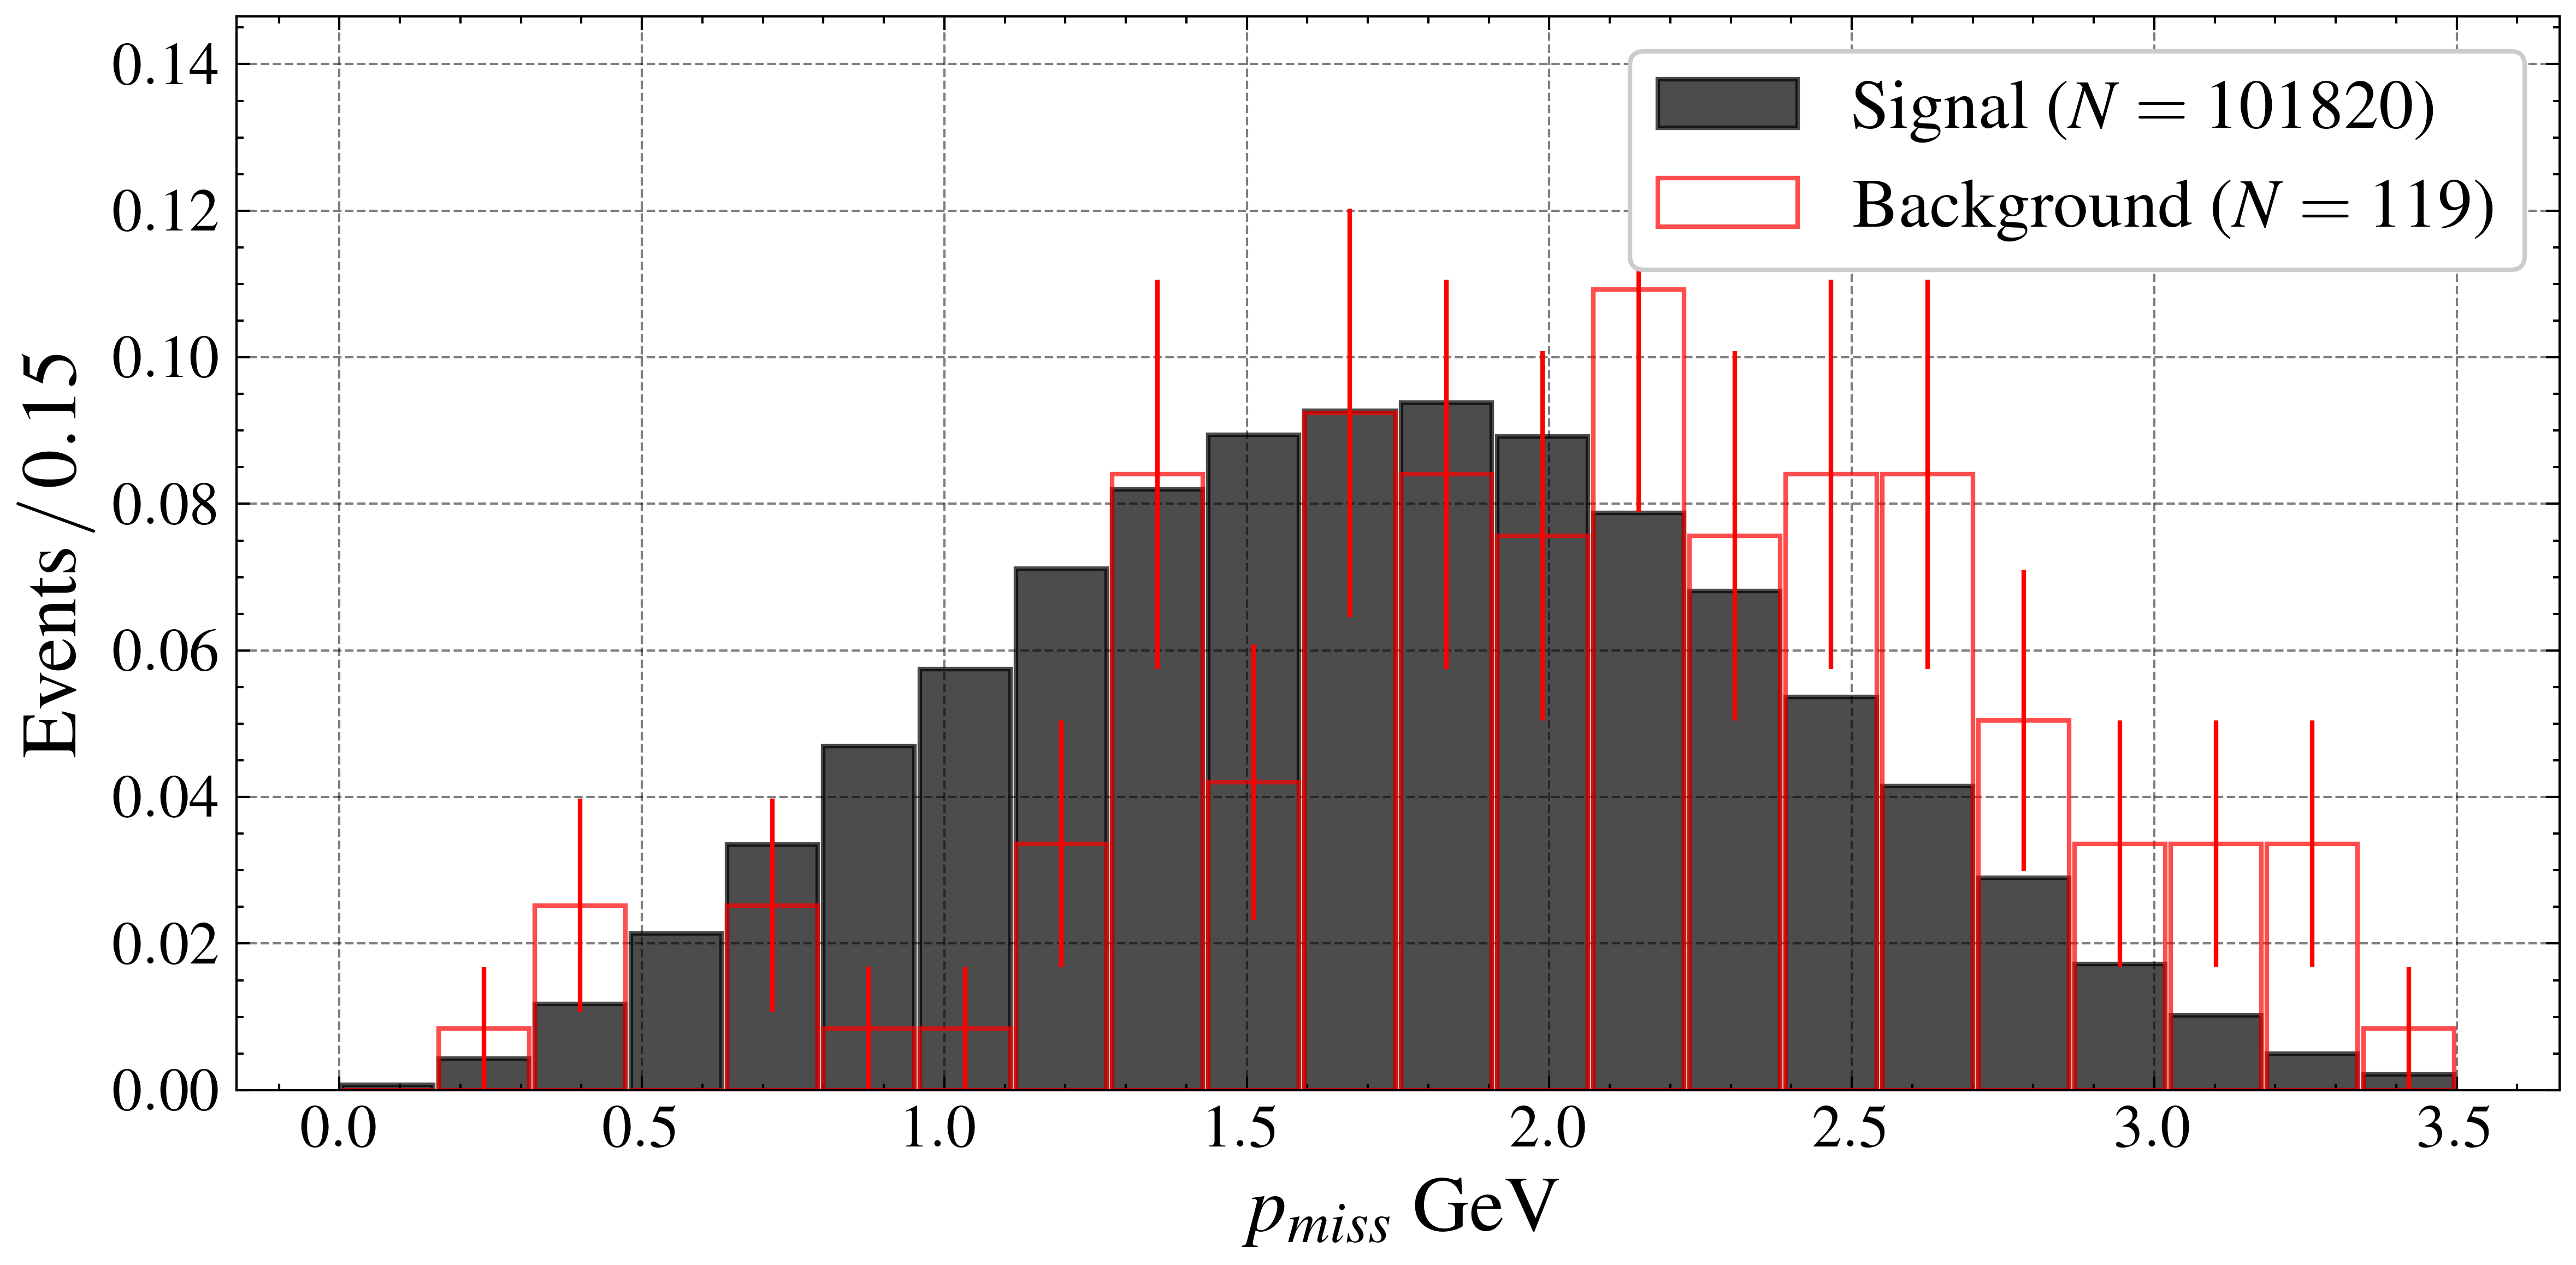

In [33]:
wbin = 0.15
a = 0
b = 3.5
bins = np.linspace(a, b, int((b-a)/wbin))

fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))



bin_centers_sig, counts_sig, N_sig = compute_histogram(
    sig, bins, "pmiss",
    filter_mask=mask & ((pc.field("E_gamma_in_ROE") < 0.2)) & mask_lep & (pc.field("is0") == 1),
    norm=True
)
ax.bar(
    bin_centers_sig, counts_sig,
    width=wbin, align='center',
    alpha=0.7, linewidth=1,
    edgecolor=colors[0], color=colors[0], ecolor=colors[0],
    label=f"Signal ($N = {N_sig}$)",
)

# Background
bin_centers_bsbs, counts_bsbs, N_bsbs = compute_histogram(
    bsbs, bins, "pmiss",
    filter_mask=mask & ((pc.field("E_gamma_in_ROE") < 0.2)) & mask_lep & (pc.field("is0") == 1),
    norm=True
)
ax.bar(
    bin_centers_bsbs, counts_bsbs,
    yerr=np.sqrt(counts_bsbs)/np.sqrt(N_bsbs),
    width=wbin, align='center',
    fill = False, alpha = 0.7, linewidth=1,
    edgecolor=colors[1], color=colors[1], ecolor=colors[1],
    label=f"Background ($N = {N_bsbs}$)"
)


ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}$')
ax.set_xlabel(r'$p_{miss} \ \mathrm{GeV}$')
ax.legend()

plt.tight_layout()
plt.show()

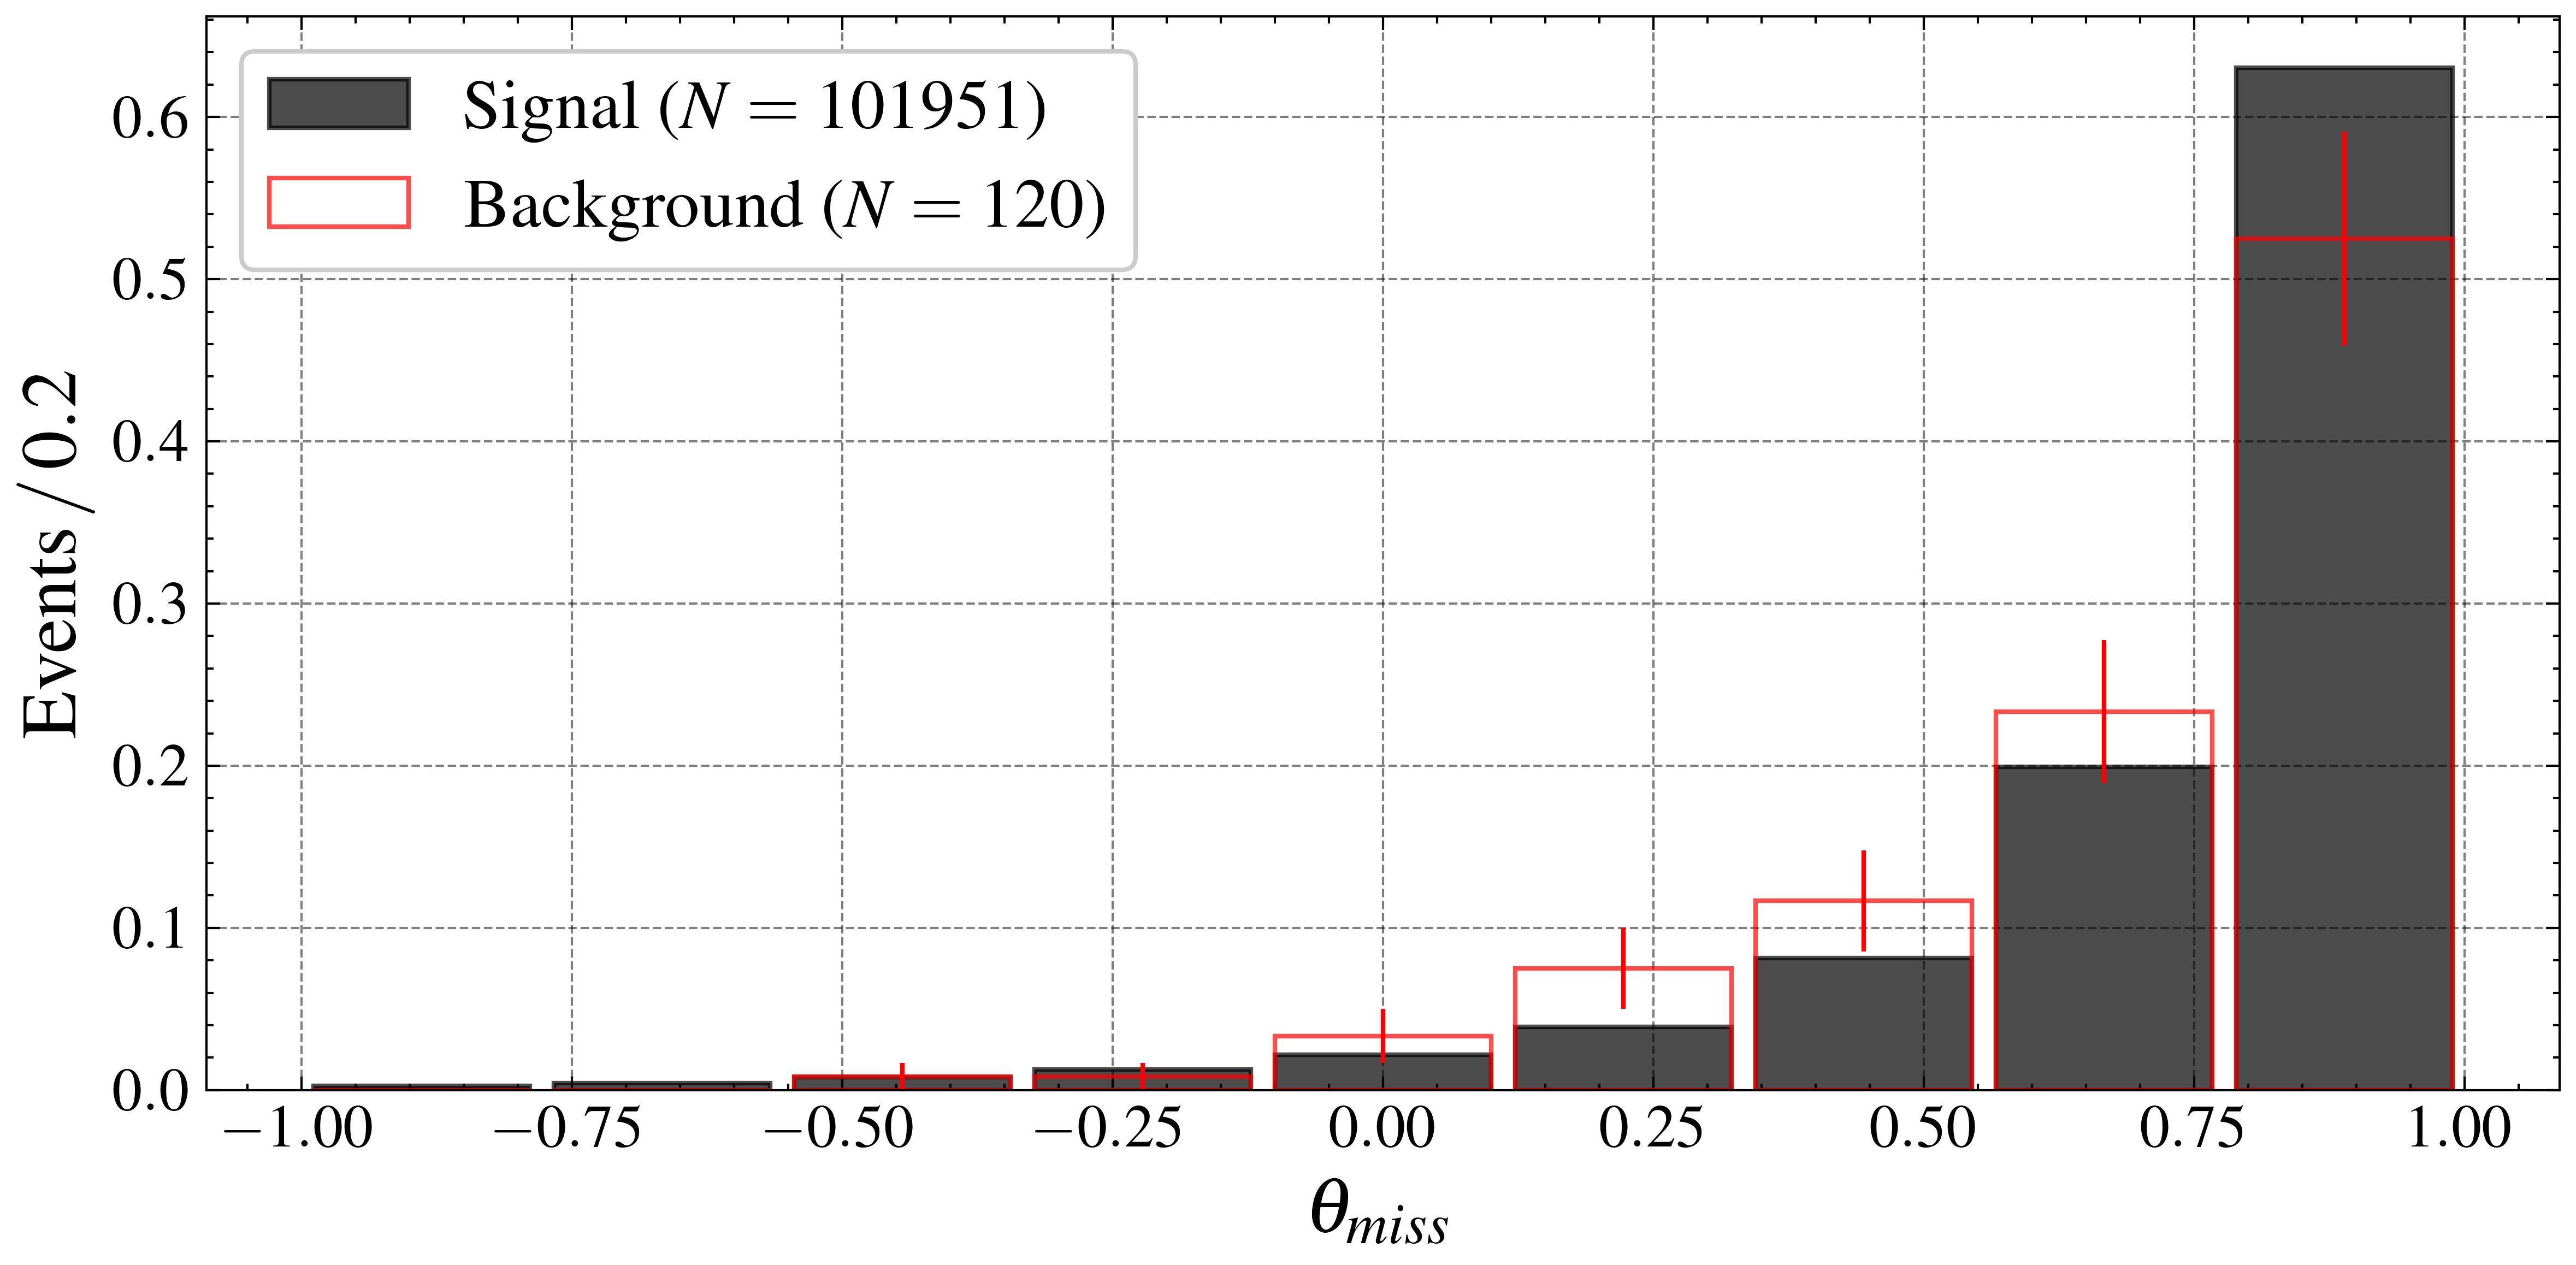

In [31]:
wbin = 0.2
a = -1
b = 1
bins = np.linspace(a, b, int((b-a)/wbin))

fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))

bin_centers_sig, counts_sig, N_sig = compute_histogram(
    sig, bins, "thetamiss",
    filter_mask=mask & ((pc.field("E_gamma_in_ROE") < 0.2)) & mask_lep & (pc.field("is0") == 1),
    norm=True
)
ax.bar(
    bin_centers_sig, counts_sig,
    width=wbin, align='center',
    alpha=0.7, linewidth=1,
    edgecolor=colors[0], color=colors[0], ecolor=colors[0],
    label=f"Signal ($N = {N_sig}$)",
)

# Background
bin_centers_bsbs, counts_bsbs, N_bsbs = compute_histogram(
    bsbs, bins, "thetamiss",
    filter_mask=mask & ((pc.field("E_gamma_in_ROE") < 0.2)) & mask_lep & (pc.field("is0") == 1),
    norm=True
)
ax.bar(
    bin_centers_bsbs, counts_bsbs,
    yerr=np.sqrt(counts_bsbs)/np.sqrt(N_bsbs),
    width=wbin, align='center',
    fill = False, alpha = 0.7, linewidth=1,
    edgecolor=colors[1], color=colors[1], ecolor=colors[1],
    label=f"Background ($N = {N_bsbs}$)"
)

ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}$')
ax.set_xlabel(r'$\theta_{miss}$')
ax.legend()

plt.tight_layout()
plt.show()

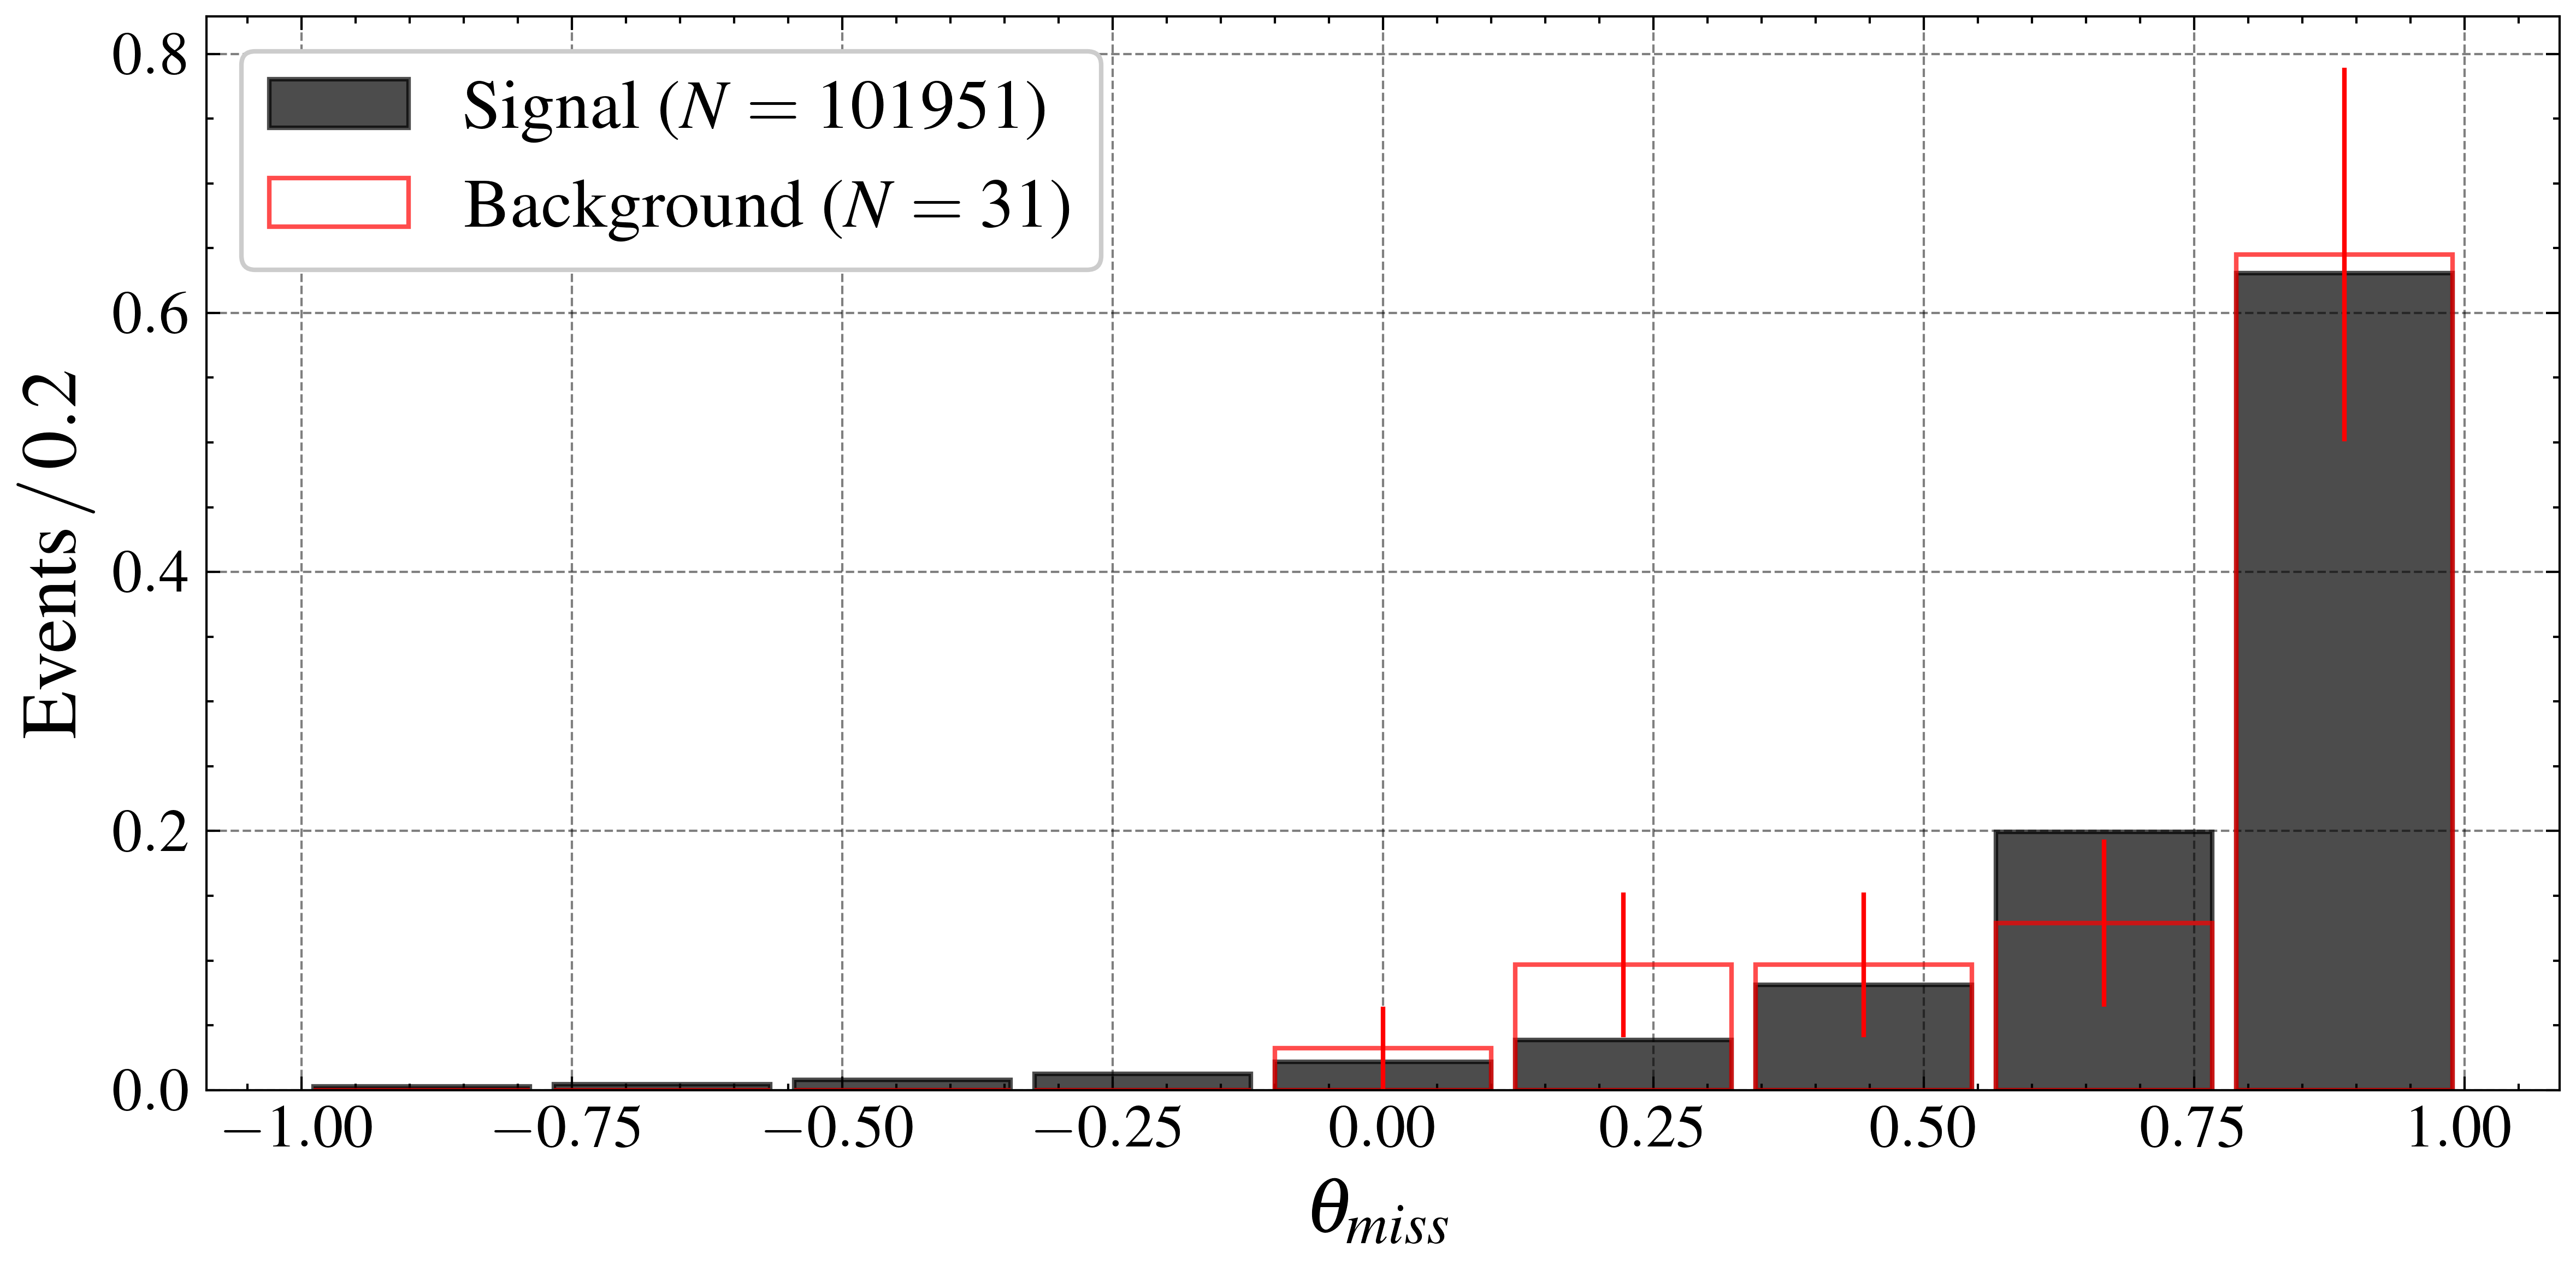

In [26]:
wbin = 0.2
a = -1
b = 1
bins = np.linspace(a, b, int((b-a)/wbin))

fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))

bin_centers_sig, counts_sig, N_sig = compute_histogram(
    sig, bins, "thetamiss",
    filter_mask=mask & ((pc.field("E_gamma_in_ROE") < 0.2)) & mask_lep & (pc.field("is0") == 1),
    norm=True
)
ax.bar(
    bin_centers_sig, counts_sig,
    width=wbin, align='center',
    alpha=0.7, linewidth=1,
    edgecolor=colors[0], color=colors[0], ecolor=colors[0],
    label=f"Signal ($N = {N_sig}$)",
)

# Background
bin_centers_bsbs, counts_bsbs, N_bsbs = compute_histogram(
    bsbs, bins, "thetamiss",
    filter_mask=mask & ((pc.field("E_gamma_in_ROE") < 0.2)) & (~ mask_lost_Kpi) & mask_lep & (pc.field("is0") == 1),
    norm=True
)
ax.bar(
    bin_centers_bsbs, counts_bsbs,
    yerr=np.sqrt(counts_bsbs)/np.sqrt(N_bsbs),
    width=wbin, align='center',
    fill = False, alpha = 0.7, linewidth=1,
    edgecolor=colors[1], color=colors[1], ecolor=colors[1],
    label=f"Background ($N = {N_bsbs}$)"
)

ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}$')
ax.set_xlabel(r'$\theta_{miss}$')
ax.legend()

plt.tight_layout()
plt.show()

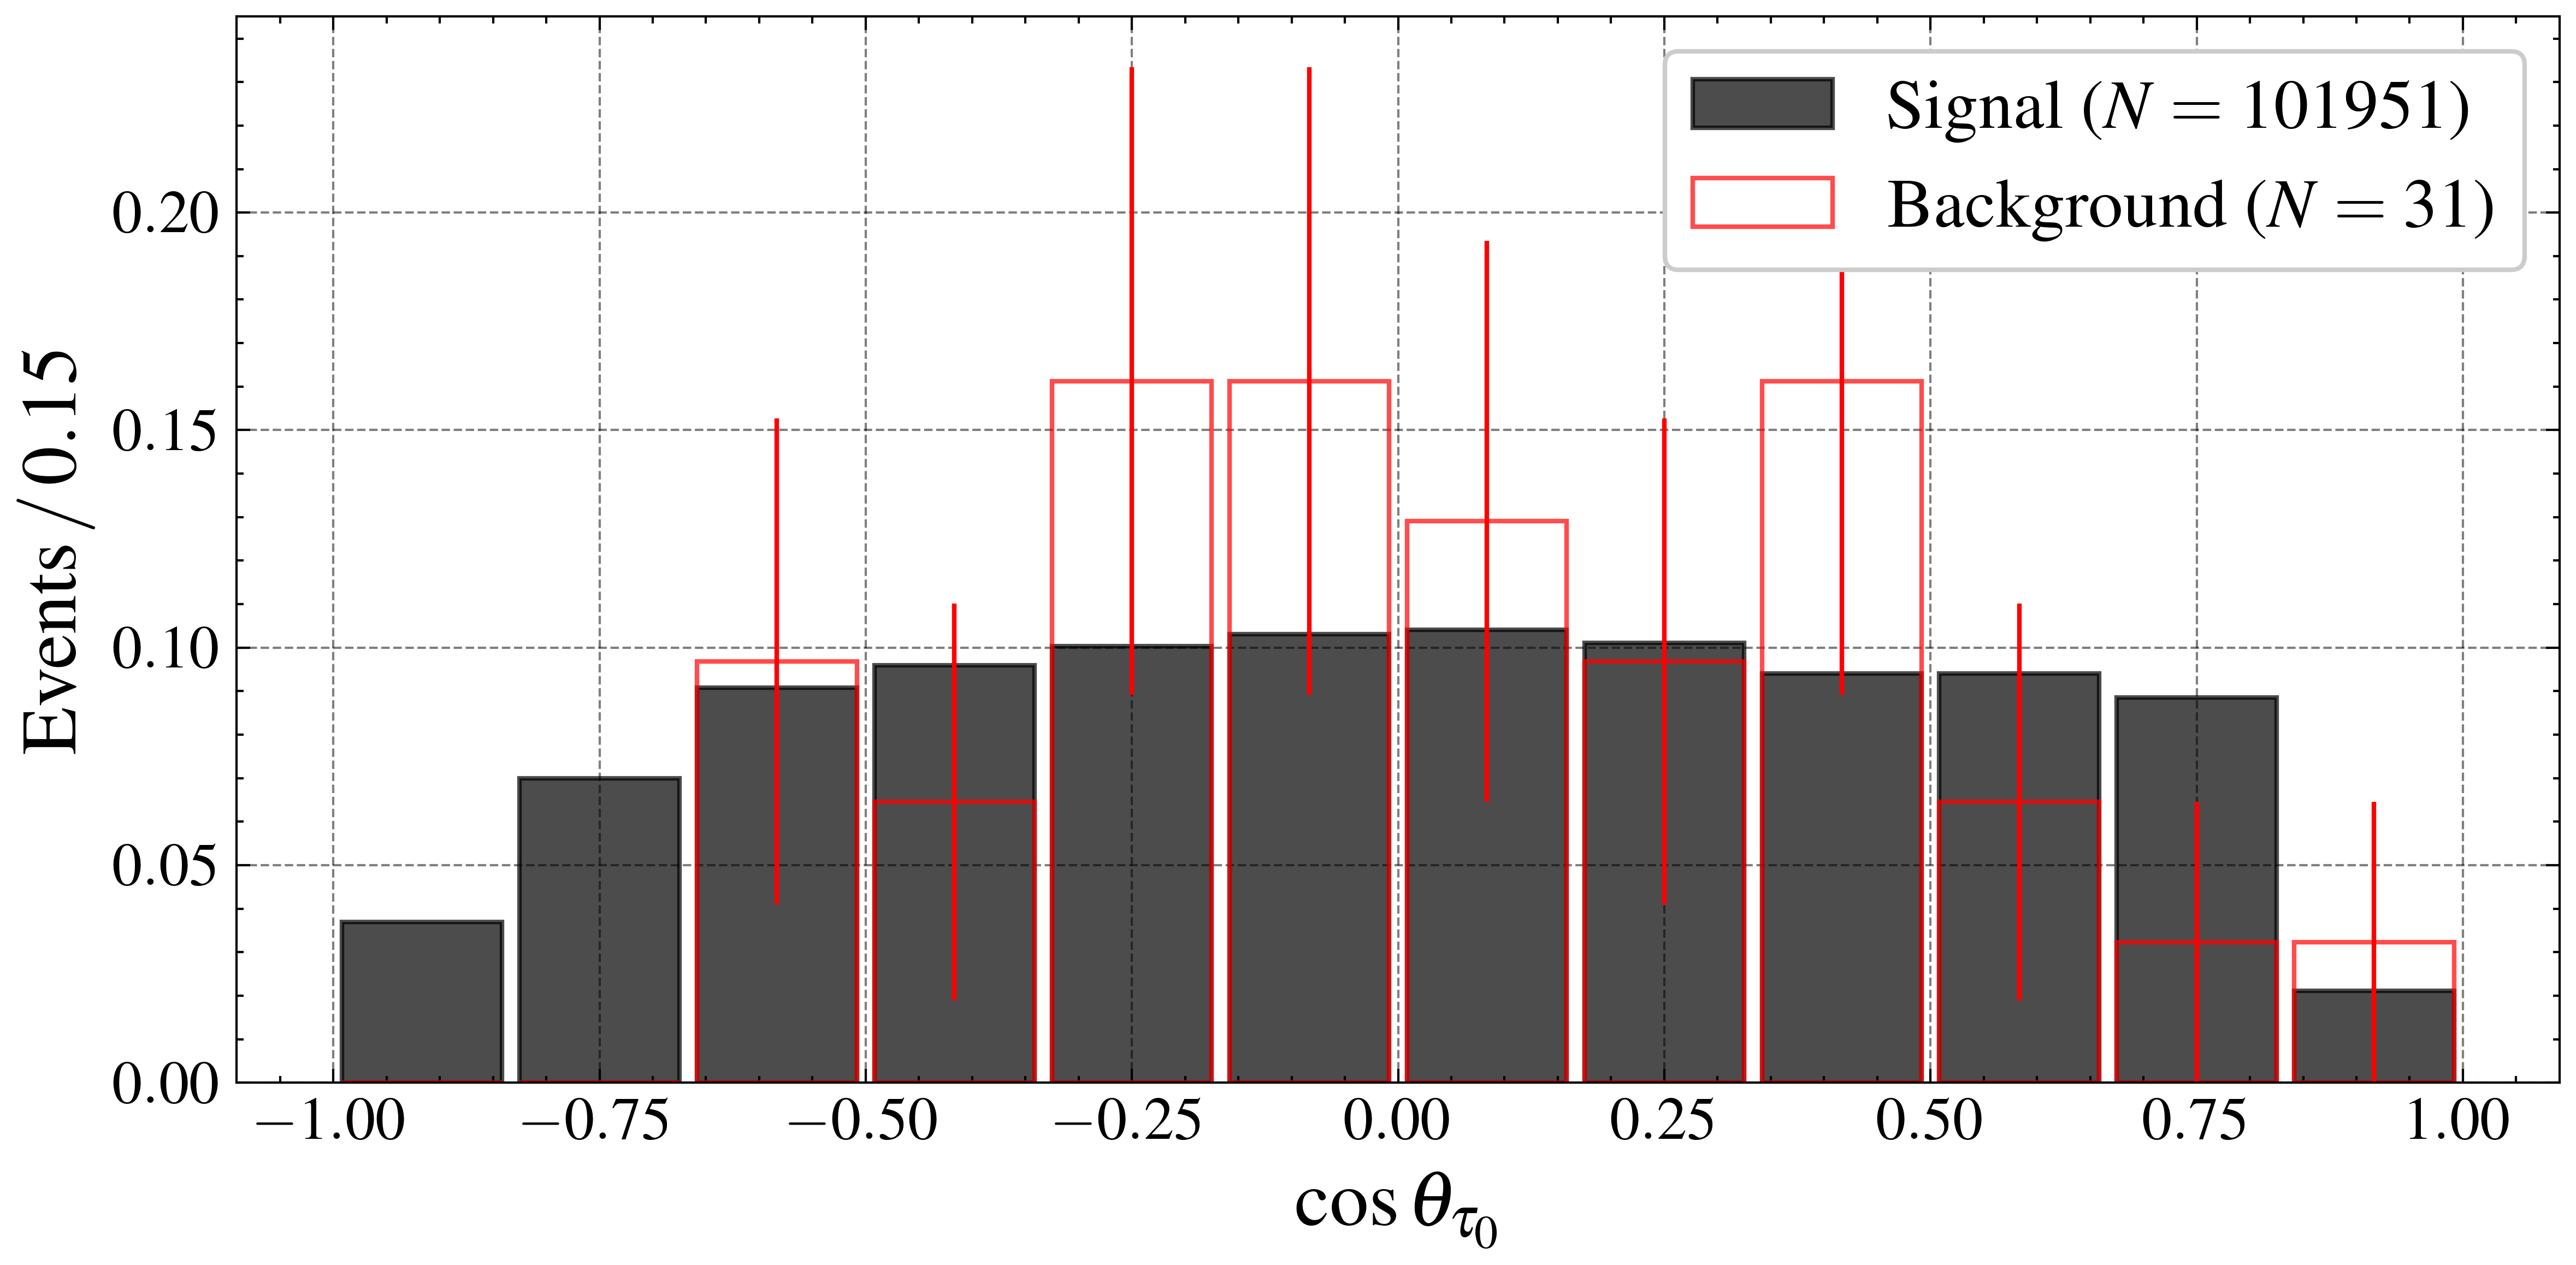

In [28]:
wbin = 0.15
a = -1
b = 1
bins = np.linspace(a, b, int((b-a)/wbin))

fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))

bin_centers_sig, counts_sig, N_sig = compute_histogram(
    sig, bins, "theta_tau_0",
    filter_mask=mask & ((pc.field("E_gamma_in_ROE") < 0.2)) & mask_lep & (pc.field("is0") == 1),
    norm=True
)
ax.bar(
    bin_centers_sig, counts_sig,
    width=wbin, align='center',
    alpha=0.7, linewidth=1,
    edgecolor=colors[0], color=colors[0], ecolor=colors[0],
    label=f"Signal ($N = {N_sig}$)",
)

# Background
bin_centers_bsbs, counts_bsbs, N_bsbs = compute_histogram(
    bsbs, bins, "theta_tau_0",
    filter_mask=mask & ((pc.field("E_gamma_in_ROE") < 0.2)) & (~ mask_lost_Kpi) & mask_lep & (pc.field("is0") == 1),
    norm=True
)
ax.bar(
    bin_centers_bsbs, counts_bsbs,
    yerr=np.sqrt(counts_bsbs)/np.sqrt(N_bsbs),
    width=wbin, align='center',
    fill = False, alpha = 0.7, linewidth=1,
    edgecolor=colors[1], color=colors[1], ecolor=colors[1],
    label=f"Background ($N = {N_bsbs}$)"
)

ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}$')
ax.set_xlabel(r'$\cos \theta_{\tau_0} $')
ax.legend()

plt.tight_layout()
plt.show()

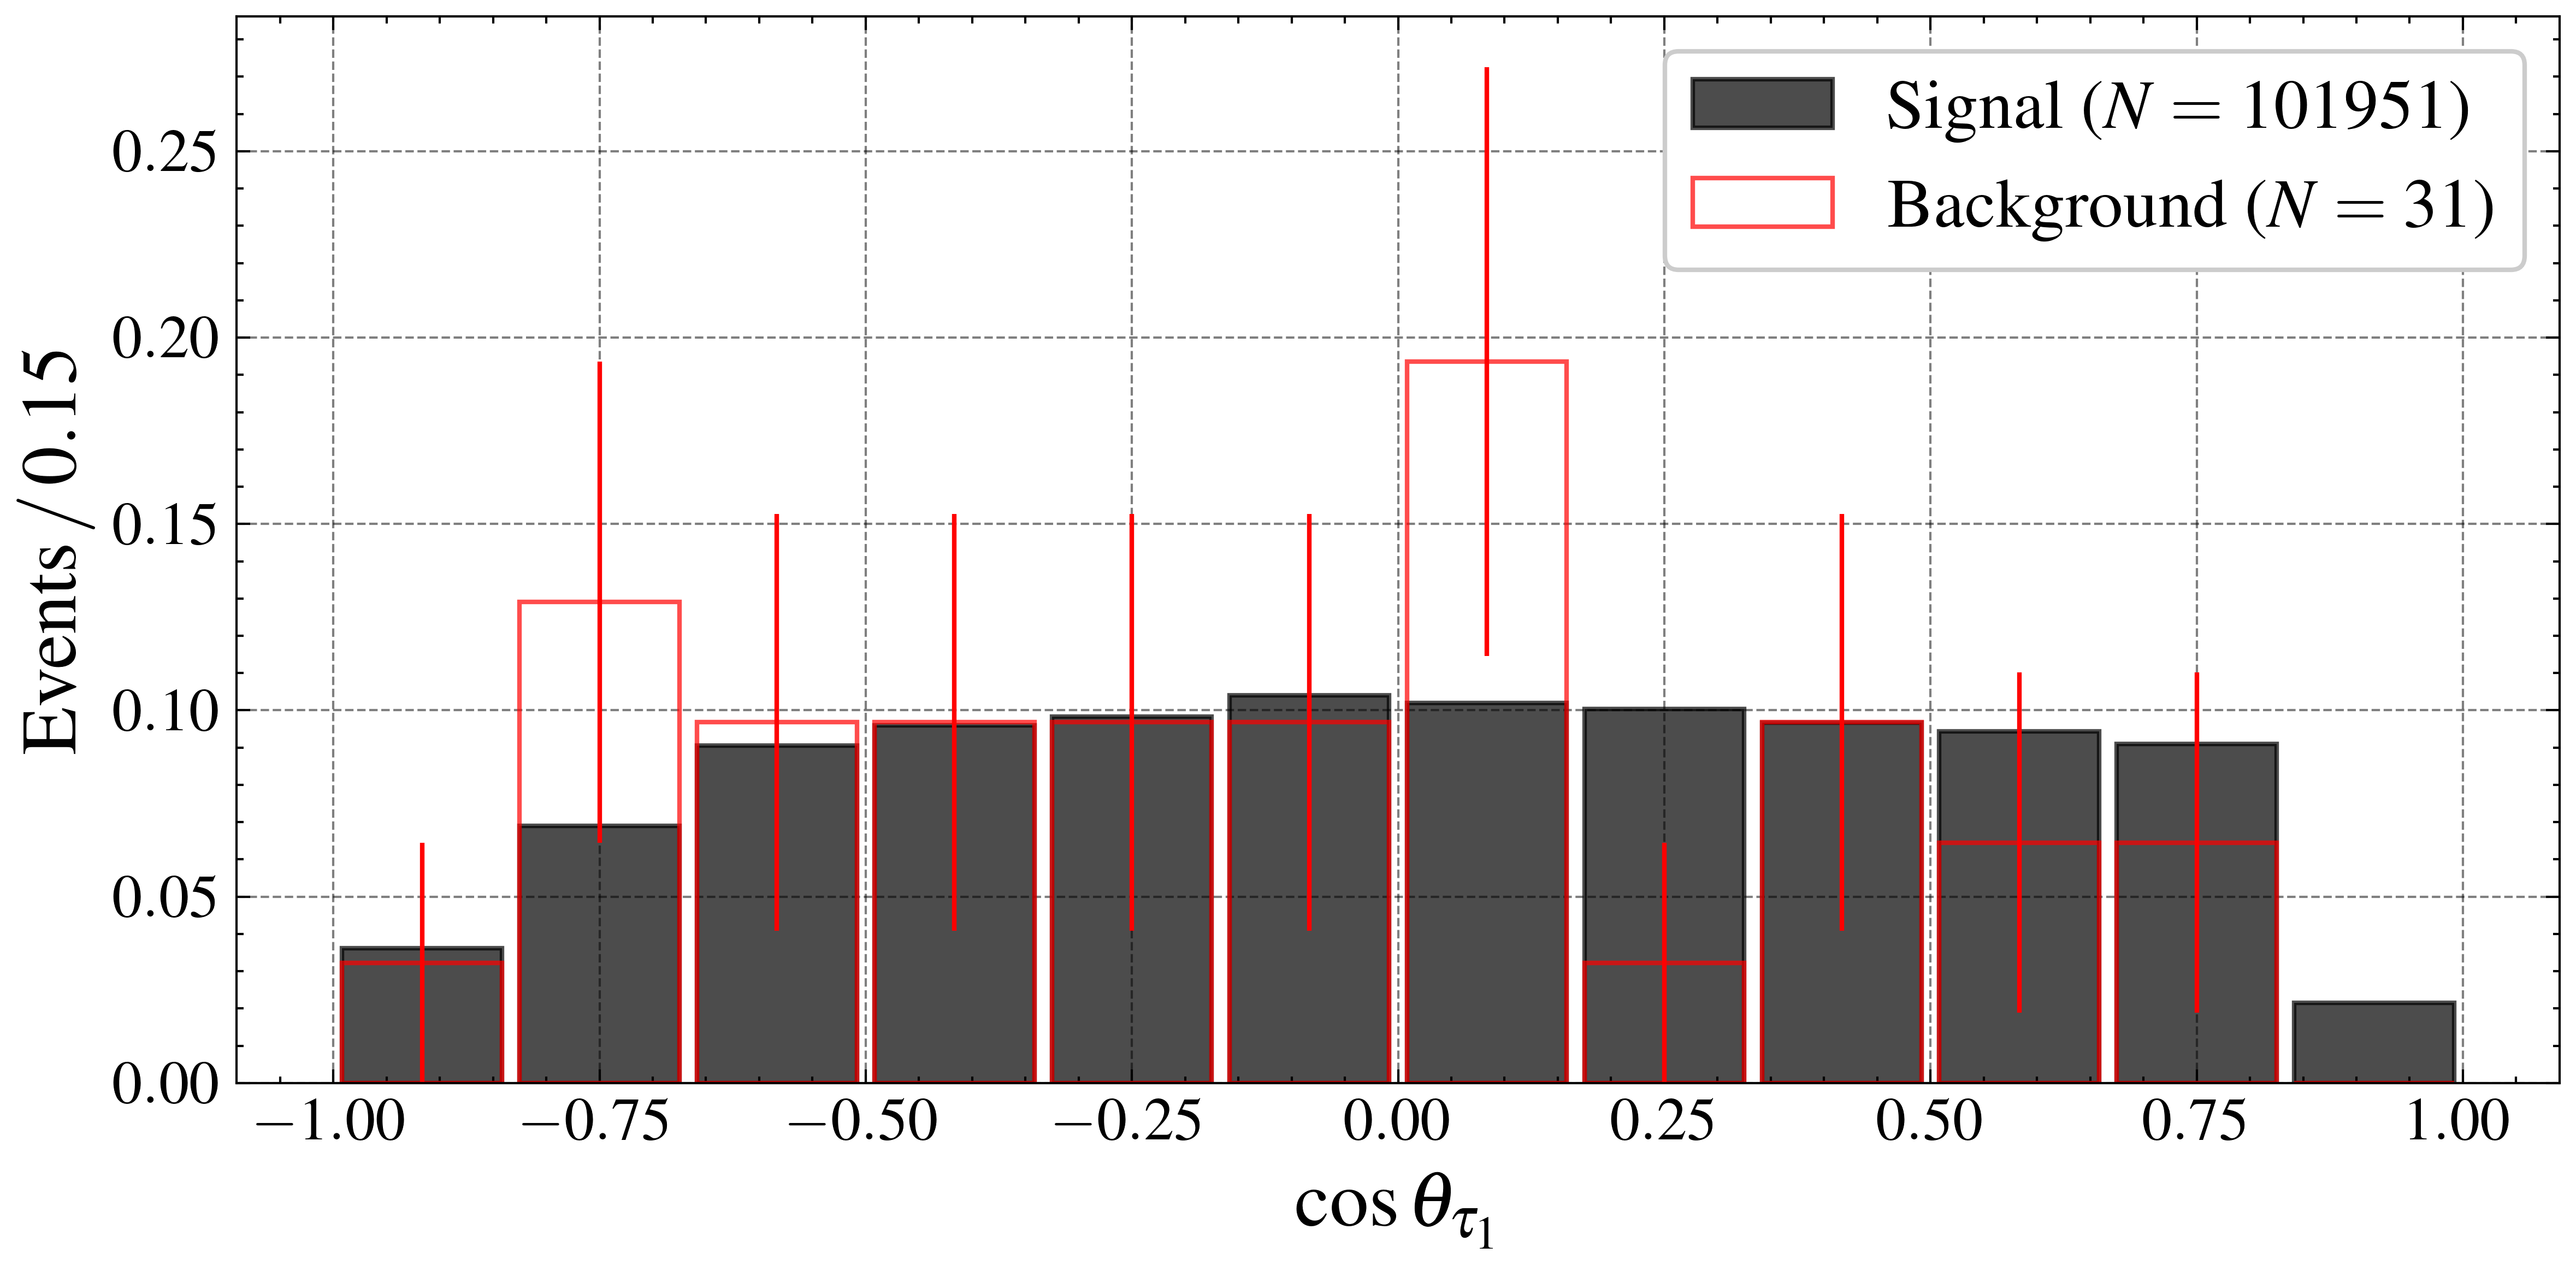

In [33]:
wbin = 0.15
a = -1
b = 1
bins = np.linspace(a, b, int((b-a)/wbin))

fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))

bin_centers_sig, counts_sig, N_sig = compute_histogram(
    sig, bins, "theta_tau_1",
    filter_mask=mask & ((pc.field("E_gamma_in_ROE") < 0.2)) & mask_lep & (pc.field("is0") == 1),
    norm=True
)
ax.bar(
    bin_centers_sig, counts_sig,
    width=wbin, align='center',
    alpha=0.7, linewidth=1,
    edgecolor=colors[0], color=colors[0], ecolor=colors[0],
    label=f"Signal ($N = {N_sig}$)",
)

# Background
bin_centers_bsbs, counts_bsbs, N_bsbs = compute_histogram(
    bsbs, bins, "theta_tau_1",
    filter_mask=mask & ((pc.field("E_gamma_in_ROE") < 0.2)) & (~ mask_lost_Kpi) & mask_lep & (pc.field("is0") == 1),
    norm=True
)
ax.bar(
    bin_centers_bsbs, counts_bsbs,
    yerr=np.sqrt(counts_bsbs)/np.sqrt(N_bsbs),
    width=wbin, align='center',
    fill = False, alpha = 0.7, linewidth=1,
    edgecolor=colors[1], color=colors[1], ecolor=colors[1],
    label=f"Background ($N = {N_bsbs}$)"
)

ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}$')
ax.set_xlabel(r'$\cos \theta_{\tau_1} $')
ax.legend()

plt.tight_layout()
plt.show()

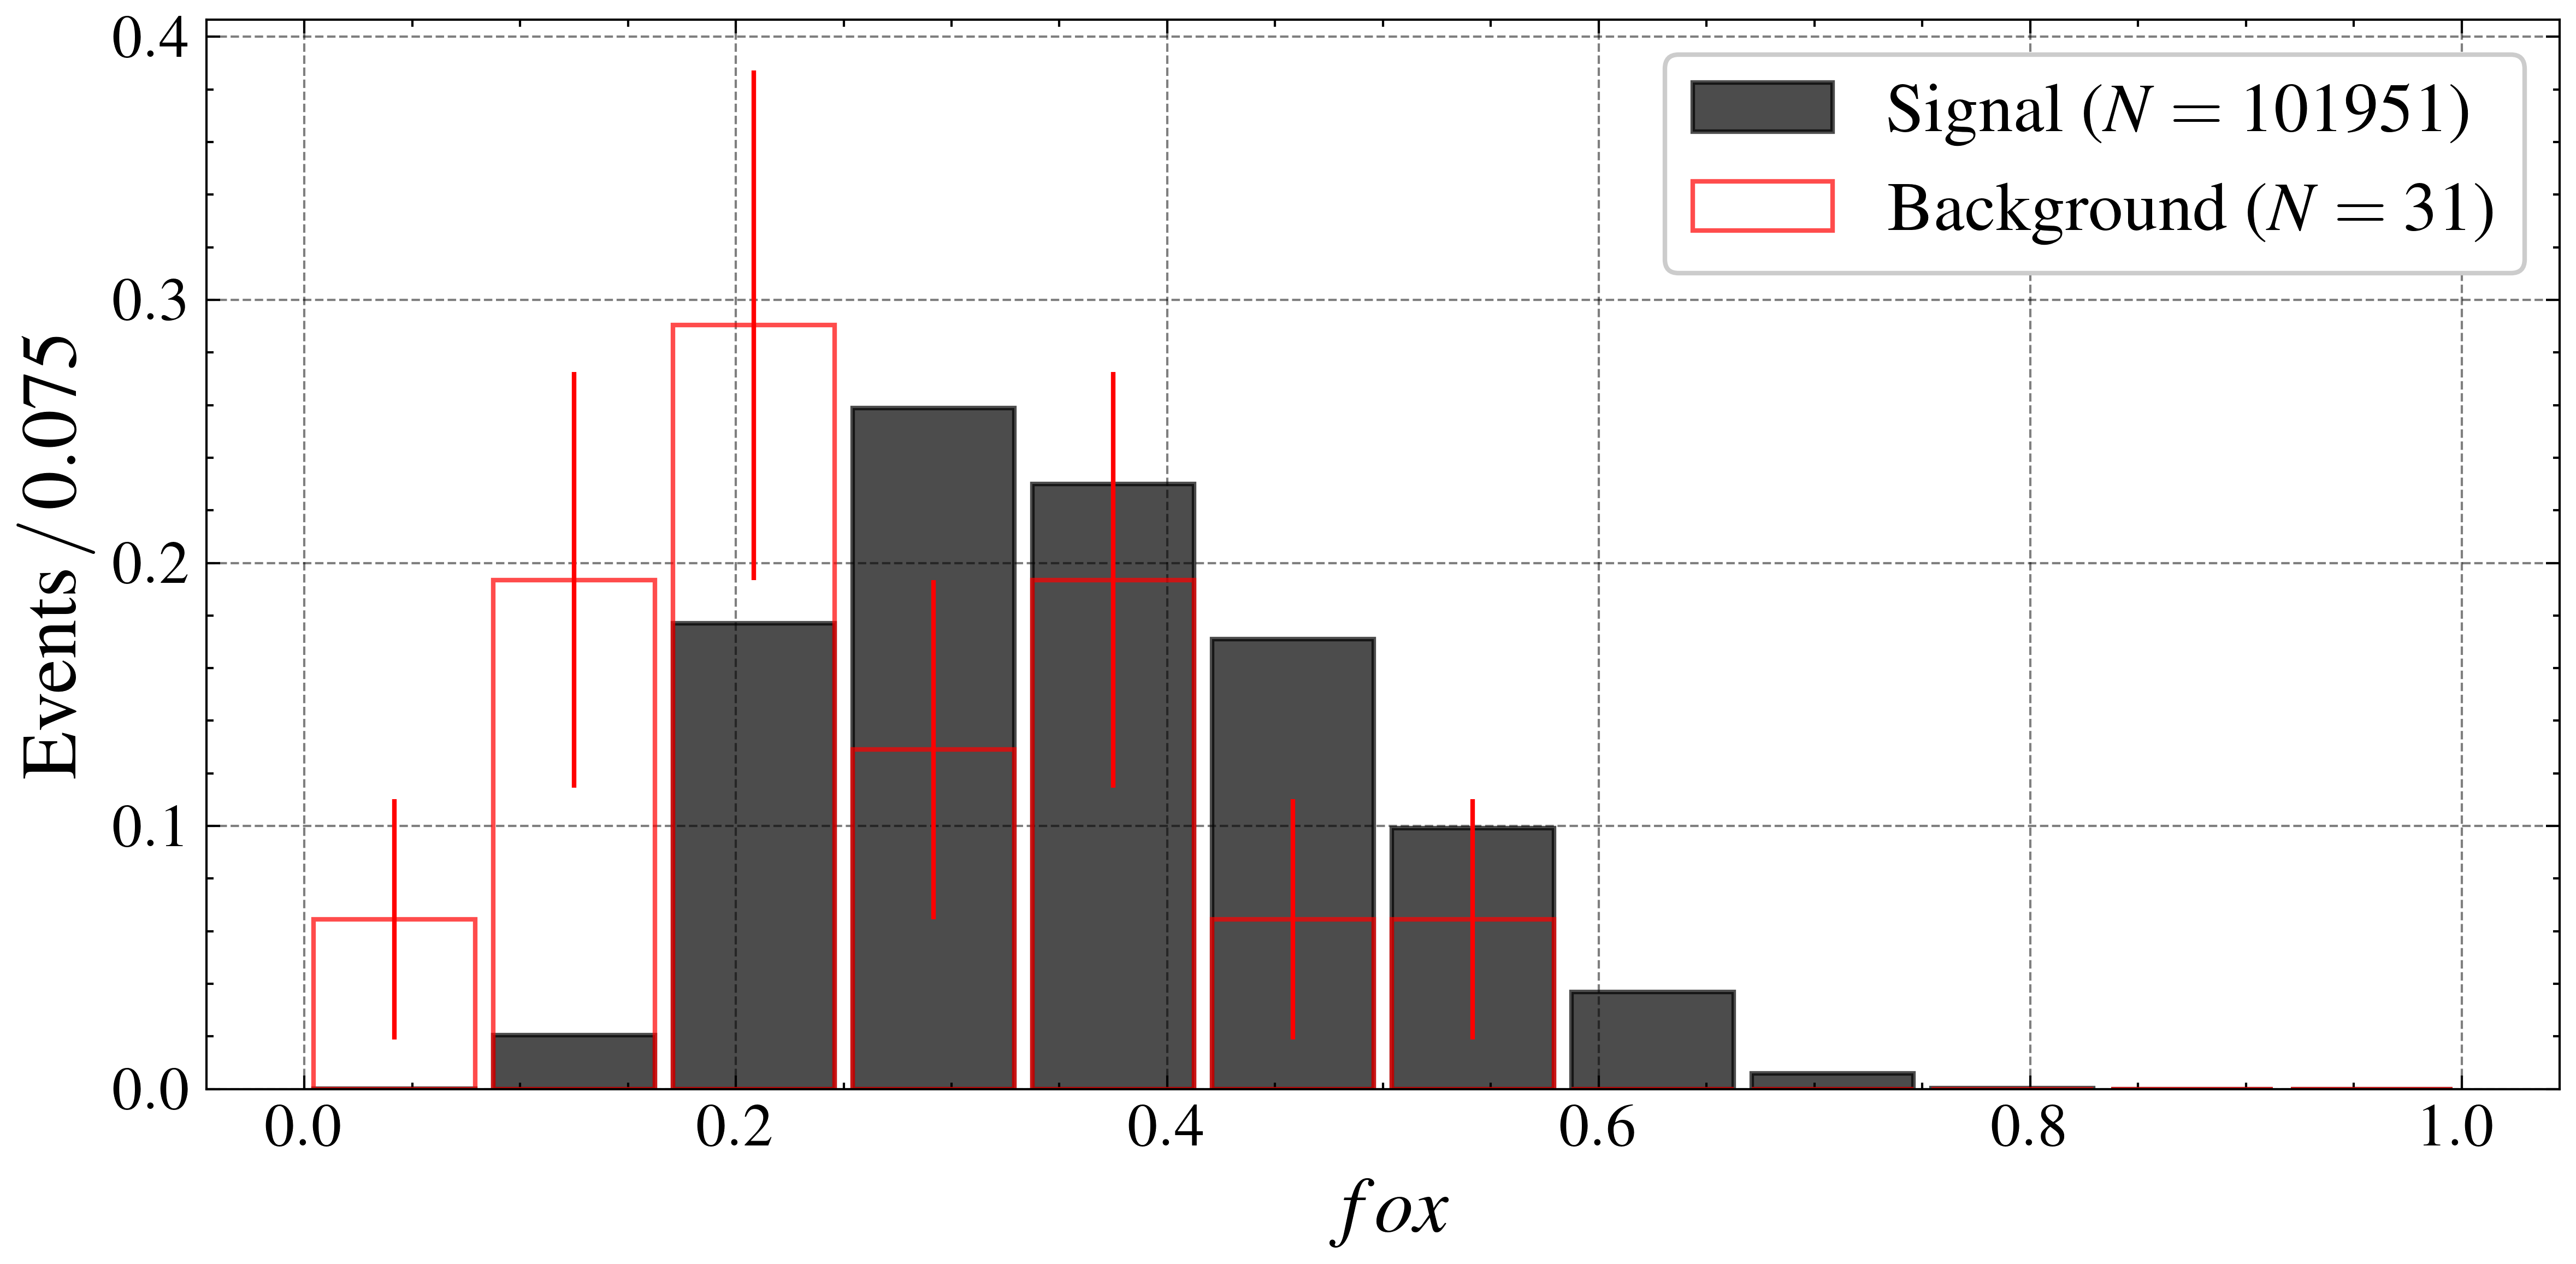

In [34]:
wbin = 0.075
a = 0
b = 1
bins = np.linspace(a, b, int((b-a)/wbin))

fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))

bin_centers_sig, counts_sig, N_sig = compute_histogram(
    sig, bins, "fox",
    filter_mask=mask & ((pc.field("E_gamma_in_ROE") < 0.2)) & mask_lep & (pc.field("is0") == 1),
    norm=True
)
ax.bar(
    bin_centers_sig, counts_sig,
    width=wbin, align='center',
    alpha=0.7, linewidth=1,
    edgecolor=colors[0], color=colors[0], ecolor=colors[0],
    label=f"Signal ($N = {N_sig}$)",
)

# Background
bin_centers_bsbs, counts_bsbs, N_bsbs = compute_histogram(
    bsbs, bins, "fox",
    filter_mask=mask & ((pc.field("E_gamma_in_ROE") < 0.2)) &  (~ mask_lost_Kpi) & mask_lep & (pc.field("is0") == 1),
    norm=True
)
ax.bar(
    bin_centers_bsbs, counts_bsbs,
    yerr=np.sqrt(counts_bsbs)/np.sqrt(N_bsbs),
    width=wbin, align='center',
    fill = False, alpha = 0.7, linewidth=1,
    edgecolor=colors[1], color=colors[1], ecolor=colors[1],
    label=f"Background ($N = {N_bsbs}$)"
)

ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}$')
ax.set_xlabel(r'$fox$')
ax.legend()

plt.tight_layout()
plt.show()

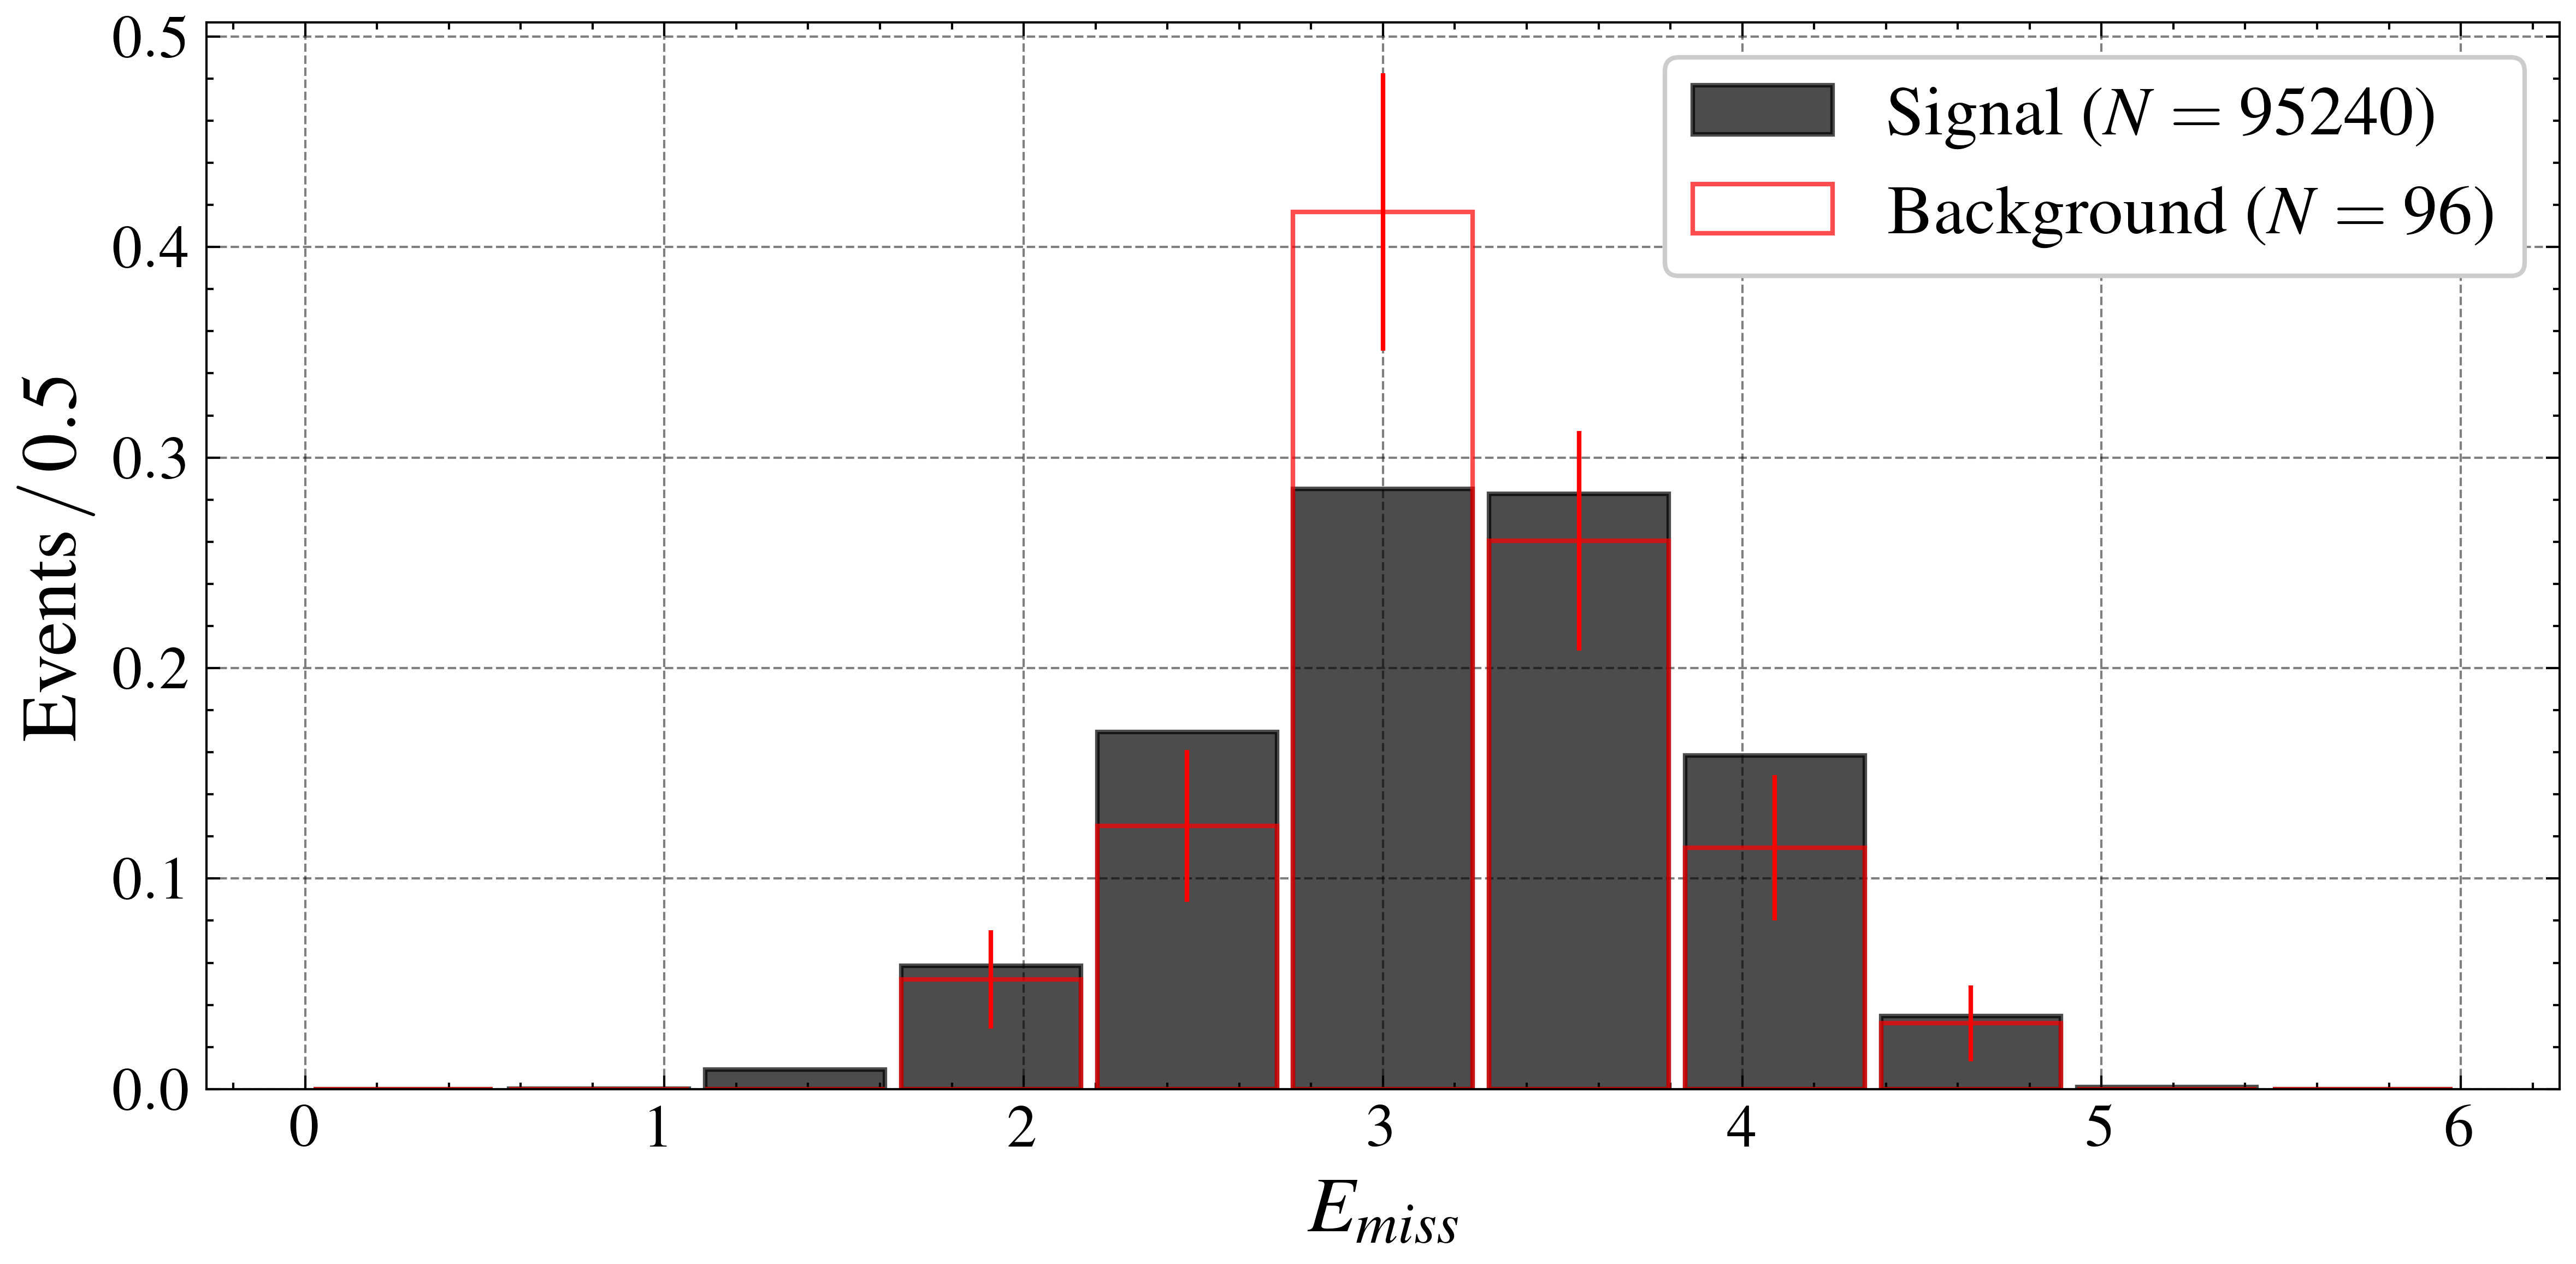

In [25]:
wbin = 0.5
a = 0
b = 6
bins = np.linspace(a, b, int((b-a)/wbin))

fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))

bin_centers_sig, counts_sig, N_sig = compute_histogram(
    sig, bins, "missedE",
    filter_mask=mask & ((pc.field("E_gamma_in_ROE") < 0.2)) & mask_lep & (pc.field("is0") == 1),
    norm=True
)
ax.bar(
    bin_centers_sig, counts_sig,
    width=wbin, align='center',
    alpha=0.7, linewidth=1,
    edgecolor=colors[0], color=colors[0], ecolor=colors[0],
    label=f"Signal ($N = {N_sig}$)",
)

# Background
bin_centers_bsbs, counts_bsbs, N_bsbs = compute_histogram(
    bsbs, bins, "missedE",
    filter_mask=mask & ((pc.field("E_gamma_in_ROE") < 0.2)) & mask_lep & (pc.field("is0") == 1),
    norm=True
)
ax.bar(
    bin_centers_bsbs, counts_bsbs,
    yerr=np.sqrt(counts_bsbs)/np.sqrt(N_bsbs),
    width=wbin, align='center',
    fill = False, alpha = 0.7, linewidth=1,
    edgecolor=colors[1], color=colors[1], ecolor=colors[1],
    label=f"Background ($N = {N_bsbs}$)"
)

ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}$')
ax.set_xlabel(r'$E_{miss}$')
ax.legend()

plt.tight_layout()
plt.show()

Total data size: 0.54 MB
Total data size: 0.02 MB


C:\Users\matve\AppData\Local\Temp\ipykernel_16544\1792178372.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


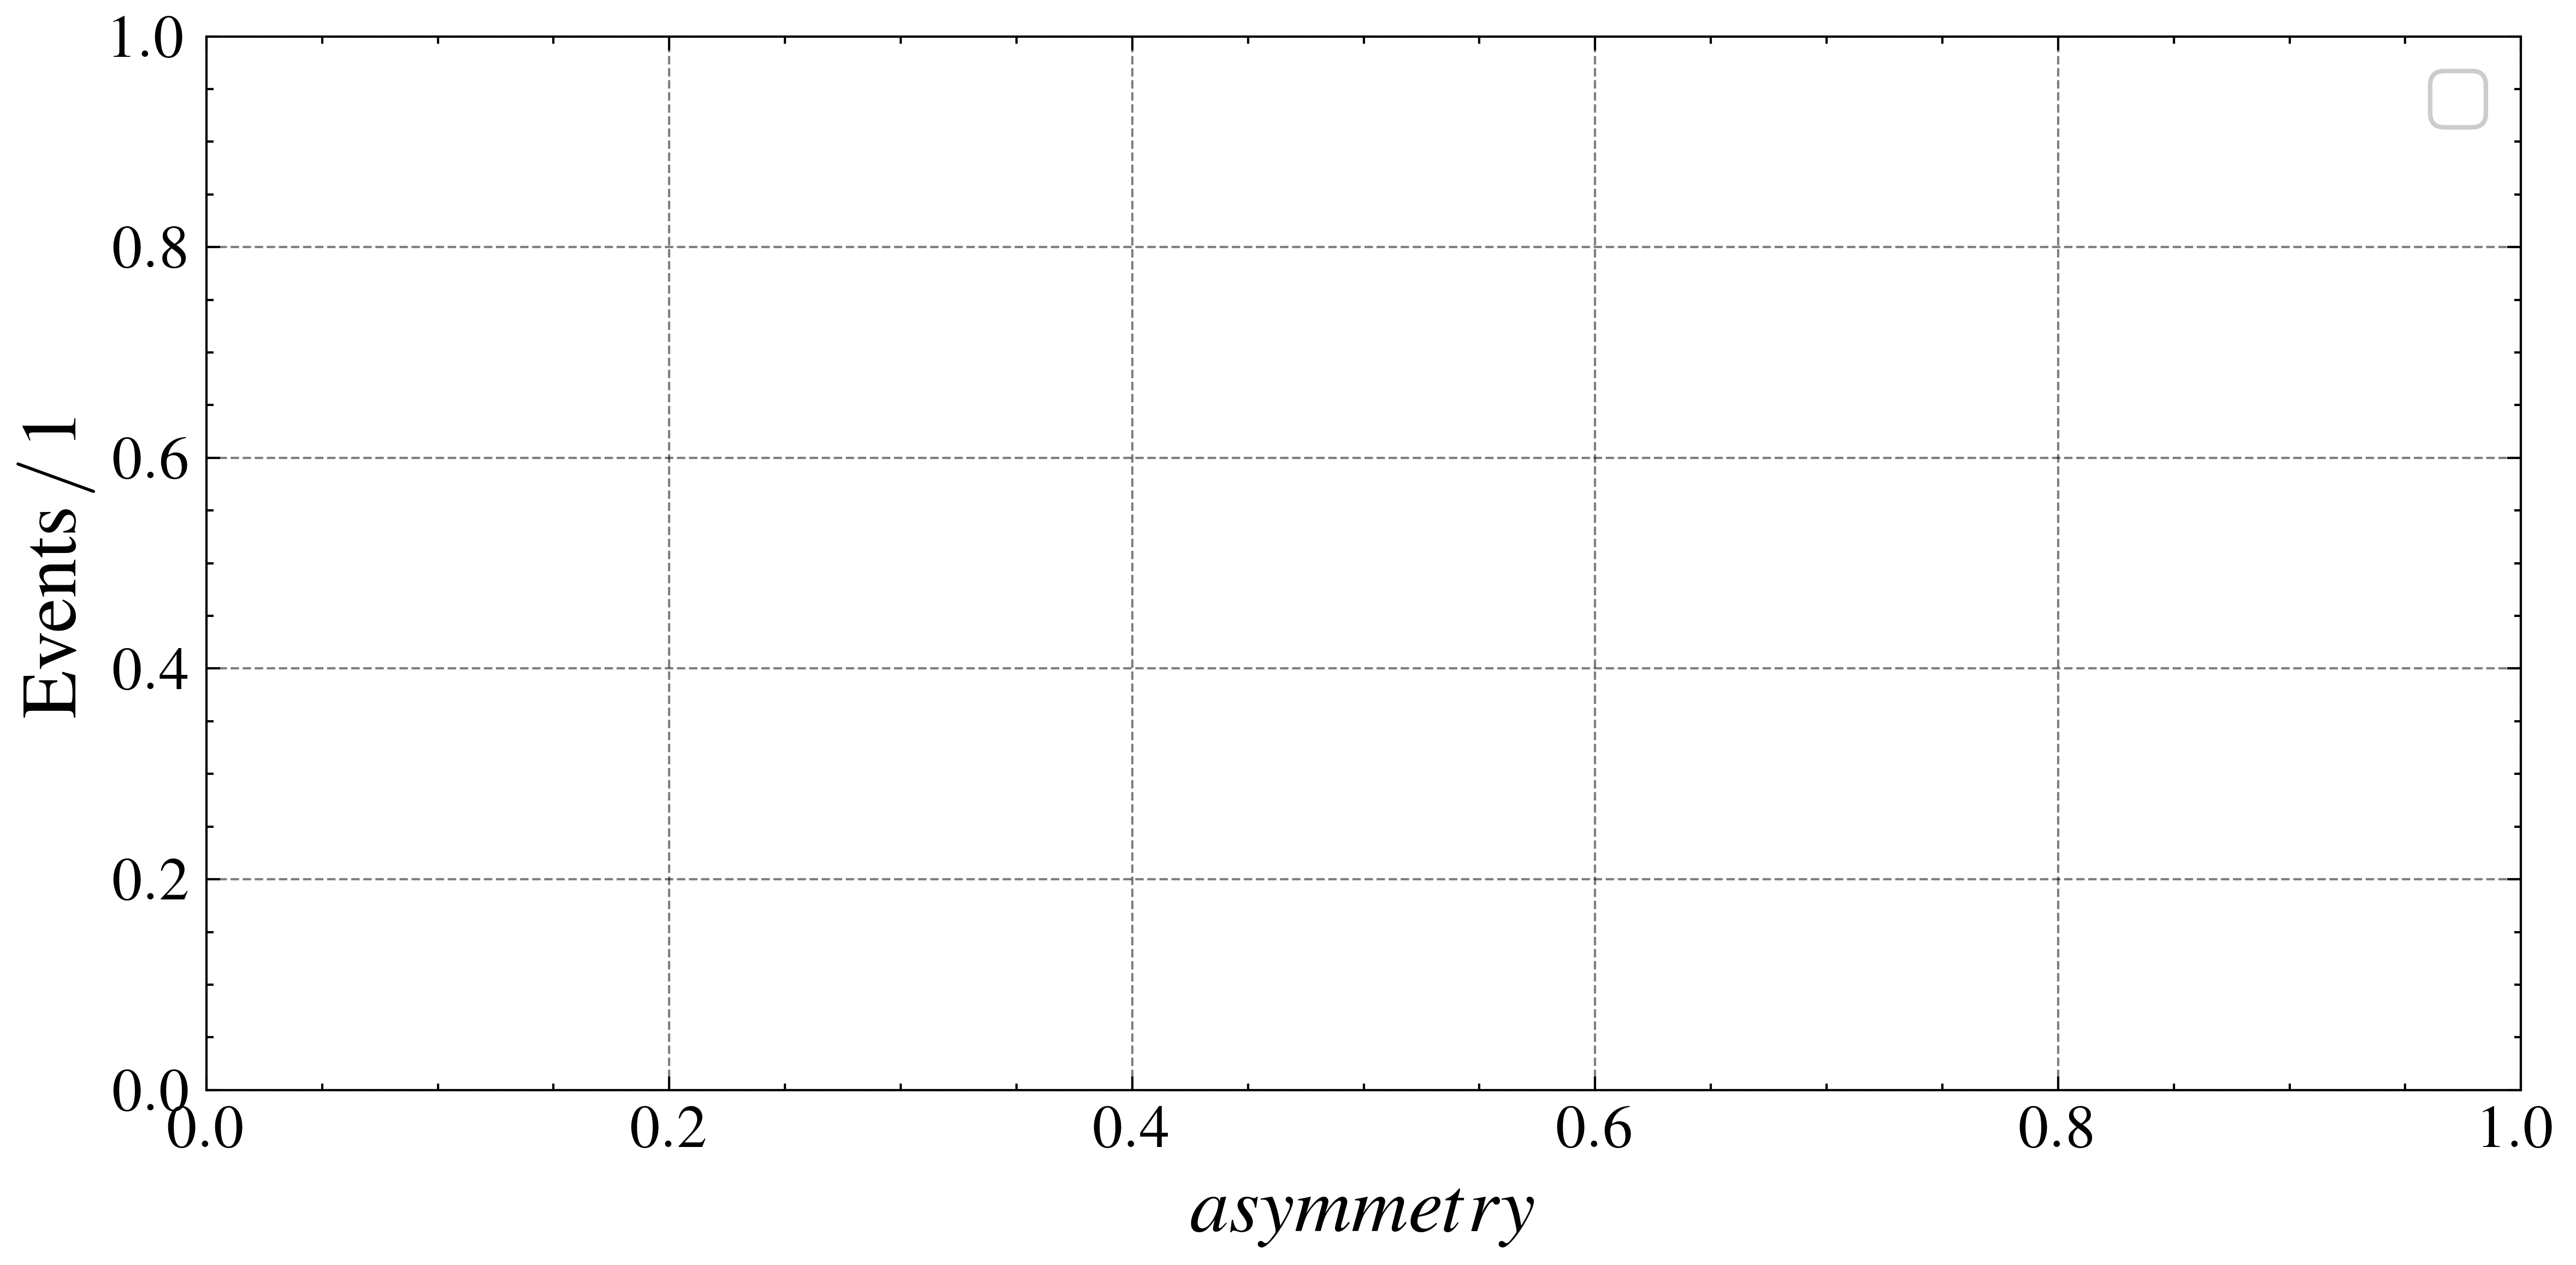

In [13]:
wbin = 1
a = -5
b = 5
bins = np.linspace(a, b, int((b-a)/wbin))

fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))

as_sig = get_values(sig, ["asymmetry", ],
    filter_mask=mask & ((pc.field("E_gamma_in_ROE") < 0.2)) & mask_KS_veto & mask_lep & (pc.field("is0") == 1),
)

as_bsbs = get_values(
    bsbs, ["asymmetry", ],
    filter_mask=mask & ((pc.field("E_gamma_in_ROE") < 0.2)) & mask_KS_veto & mask_lep & (pc.field("is0") == 1),
)

ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}$')
ax.set_xlabel(r'$asymmetry$')
ax.legend()

plt.tight_layout()
plt.show()